$$Title of Project:$$ $$Predicting House Prices using Machine Learning$$
___

# **Objective:**

The objective of this project is to predict house prices based on various features such as the number of rooms, location, size, and more. The goal is to build a model that can accurately estimate the price of a house given its features.



# Data Source:

The dataset used for this project is the Ames Housing dataset available on Kaggle.



# Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Import Data:

In [4]:

data = pd.read_csv("/content/Housing.csv")
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Describe Data:

In [5]:

data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Data Visualization:

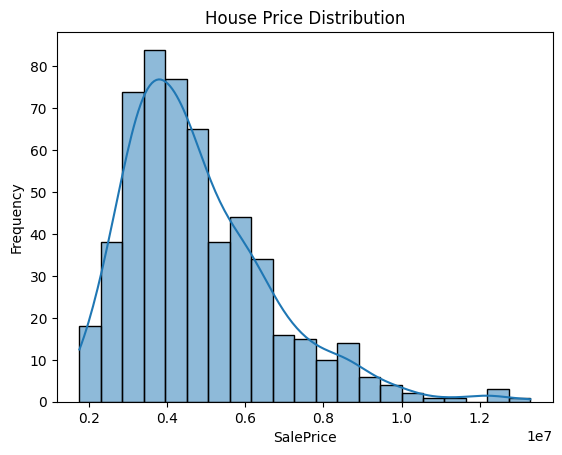

In [9]:
sns.histplot(data['price'], kde=True)
plt.title('House Price Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


# Data Preprocessing:

In [13]:
data = pd.get_dummies(data, drop_first=True)

data.isnull().sum().sum()


0

# Define Target Variable (y) and Feature Variables (X):

In [14]:
X = data.drop('price', axis=1)
y = data['price']


# Train Test Split:

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeling:

In [16]:

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

# Model Evaluation:

In [17]:

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1754318687330.6638
R-squared: 0.6529242642153184


# Prediction:

In [23]:
new_data = pd.DataFrame([[4, 3, 2500, 1, 1, 3, 2, 2]],
                        columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Feature8'])  # Adjust with actual columns

new_data = new_data.reindex(columns=X_train.columns, fill_value=0)

new_data_scaled = scaler.transform(new_data)

predicted_price = model.predict(new_data_scaled)
print(f"Predicted House Price: {predicted_price[0]}")


Predicted House Price: -5923935.640025404


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Explaination

**1. Data Exploration:**


*   This is like getting to know your data before you
start using it. We looked at the data to understand what information it holds (like the number of rooms, price, location, etc.).

*   We also checked if any information was missing (like
if some house prices were not recorded). We filled in those missing values or handled them in a way that didn’t mess up our analysis.
*   Finally, we turned categories (like "Yes" or "No" for whether a house has a basement) into numbers that the model can understand. This step is called "encoding."

**2. Modeling:**


*   Now, we wanted to use the data to predict house prices. So, we chose a method called linear regression. Think of this like drawing a straight line that best fits the relationship between the features (like house size or number of bedrooms) and the price.
*   We used the training data (data we already knew the prices for) to "teach" the model how to make predictions based on the features.

**3. Evaluation:**


*   After training the model, we needed to check how well it worked. We used two measures:


*  Mean Squared Error (MSE): This tells us how far off the model’s predictions were from the actual house prices. Lower numbers are better.
*   R-squared: This tells us how much of the variation in house prices can be explained by our features. A higher number (closer to 1) means the model did a good job.


*  The model did pretty well, but sometimes we might get even better results with more complex methods like decision trees or random forests, which are more flexible than simple linear regression.

**4. Prediction:**


*   After making sure our model worked well, we used it to predict house prices for new data. This means, given some features (like number of rooms, size, etc.), the model can estimate what the price of a house would be.
